In [1]:
from __future__ import annotations

from pathlib import Path

import dill
import numpy as np
import rich
from matbench_discovery.enums import MbdKey
from matbench_discovery.metrics import stable_metrics
from pymatviz import Key
from tqdm.auto import tqdm

results_dir = Path(
    "/net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-backbone/notebooks/results/epoch0-step57444/"
)
results = list(results_dir.glob("*.dill"))
print(f"Found {len(results)} results")

predicted_eform_list: list[float] = []
true_eform_list: list[float] = []

predicted_ehull_list: list[float] = []
true_ehull_list: list[float] = []

for result_path in tqdm(results):
    with result_path.open("rb") as f:
        result = dill.load(f)

    # Ignore non-unique prototypes
    if not result["metadata"][Key.uniq_proto.value]:
        continue

    eform_pred = result["energy"]
    predicted_eform_list.append(eform_pred)

    eform_true = result["metadata"][MbdKey.e_form_wbm.value]
    true_eform_list.append(eform_true)

    hull_true = result["metadata"][MbdKey.each_true.value]
    true_ehull_list.append(hull_true)

    hull_pred = hull_true + (eform_pred - eform_true)
    predicted_ehull_list.append(hull_pred)

predicted_eform = np.array(predicted_eform_list)
true_eform = np.array(true_eform_list)

predicted_ehull = np.array(predicted_ehull_list)
true_ehull = np.array(true_ehull_list)

rich.print(stable_metrics(true_ehull, predicted_ehull))

Found 5256 results


  0%|          | 0/5256 [00:00<?, ?it/s]

{
    'F1': 0.535042735042735,
    'DAF': 4.1218176276534715,
    'Precision': 0.6285140562248996,
    'Recall': 0.46577380952380953,
    'Accuracy': 0.8765600181529385,
    'TPR': 0.46577380952380953,
    'FPR': 0.049531459170013385,
    'TNR': 0.9504685408299867,
    'FNR': 0.5342261904761905,
    'TP': 313,
    'FP': 185,
    'TN': 3550,
    'FN': 359,
    'MAE': 0.16952136692357164,
    'RMSE': 0.27801628299507775,
    'R2': -1.2046980736265387
}

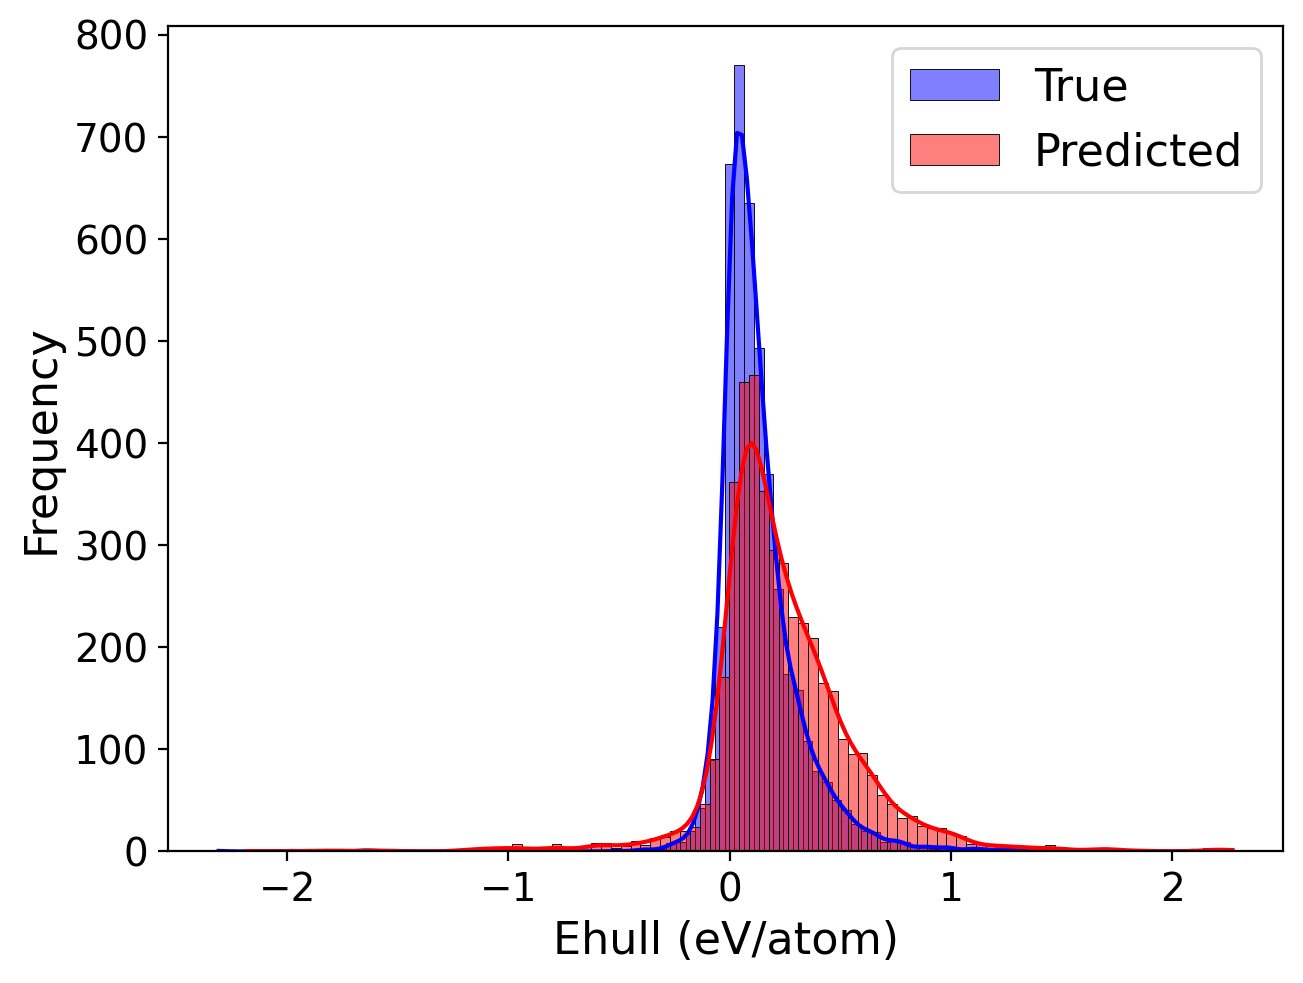

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

sns.histplot(true_ehull, bins=100, kde=True, color="blue", label="True", ax=ax)
sns.histplot(predicted_ehull, bins=100, kde=True, color="red", label="Predicted", ax=ax)

ax.set_xlabel("Ehull (eV/atom)")
ax.set_ylabel("Frequency")
ax.legend()
plt.show()